In [40]:
from numpy.random import seed
seed(0)
import tensorflow as tf
tf.set_random_seed(0)
import numpy as np
import scipy.io as sio
import warnings
import keras
import matplotlib.pyplot as plt

from config import params
import peak_det
from importlib import reload
peakdet = reload(peak_det).peakdet

# don't use GPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# NaN warnings are ok for now
warnings.filterwarnings("ignore",category = RuntimeWarning) 

# set filepaths 
datapath = '_5track_'
modelname = 'FNN_models/05deep_0512hid_softmax_categorical_crossentropy_16110batch_incoh'
# modelname = '2DCNN_models/05deep_0016hid_softmax_categorical_crossentropy_1024batch_incoh_maxpool'

# Test data parameters #
lim = 1 # degrees (accuracy within)
x_test = np.load(params.fpath + 'test/' + params.fname + 'xtest' + datapath + str(10) + 'snaps.npy')
Nsim = x_test.shape[0] # number of test samples
snr_vec = [20]#,10,20,100]
snap_vec = [10]

print('Number of sources:', params.Nsources)

Number of sources: 5


In [41]:
# # Load the FNN model # #
model = keras.models.load_model(modelname + '.h5')  
print('Loading: ', modelname)

x_test = np.load(params.fpath + 'test/' + str(snr_vec[0])+ 'dB/xtest' + datapath + str(snap_vec[0]) + 'snaps.npy')

Loading:  FNN_models/05deep_0512hid_softmax_categorical_crossentropy_16110batch_incoh


In [42]:
layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(x_test) 

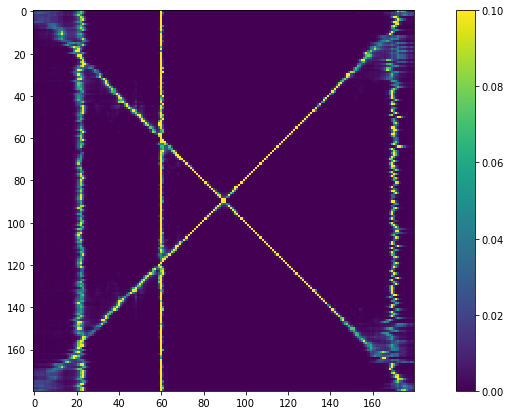

In [43]:
plt.figure(figsize=(15,7))
plt.imshow(activations[-1])
plt.clim((-0,0.1))
plt.colorbar()
plt.show()